<a href="https://colab.research.google.com/github/YvixMiHo/Image_classification_2d_circle/blob/main/Neural_Net_for_Classification_Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Examples of Classification Problems

>is this spam or not - Binary Classification

>is this photo sushi, steak, pizza? - Multicass classfincation

>what tags should this article have - Multilabel classification


## 1. Import dependencies

In [23]:
import tensorflow as tf 

import pandas as pd 

import matplotlib.pyplot as plt 

import numpy as np 

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split 

from sklearn.datasets import make_circles


## 2. Helper function to plot boundary 

In [24]:
def plot_descision_boundary(model, X, y):
  """
  plots the decision
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() - 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  #create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]
  #make predictions
  y_pred = model.predict(x_in)
  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    # have to reshape prediction
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundray
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu) 
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [25]:
#create number of samples
samples = 1000

#create circle
X,y = make_circles(samples,
                    
                   noise = 0.03,
                   random_state=42
                   )

## 3. Visualize the data

In [26]:
X,y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [27]:
circles_table = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles_table

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


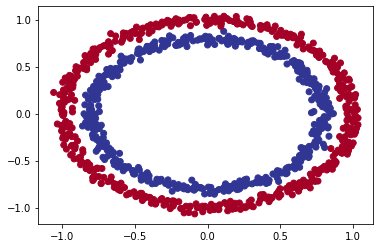

In [28]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [29]:
data_in = X #Circle_model.drop("charges", axis = 1) 
data_out = y #Circle_model["charges"] 
train_data_in  = X
train_data_out = y
test_data_in = X
test_data_out = y
#train_data_in, test_data_in, train_data_out, test_data_out= train_test_split(data_in, data_out, test_size = 0.2, random_state = 42) 

## 4. Create, Train and format a model

In [47]:
#1. create our model 

tf.random.set_seed(42) 
Circle_model = tf.keras.Sequential([ 

     tf.keras.layers.Dense(4, activation = "relu"), 
     tf.keras.layers.Dense(4, activation = "relu"),
     tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)      

]) 

 
#2. Compile the model 

Circle_model.compile( 

    loss = tf.keras.losses.BinaryCrossentropy(),  

    optimizer = tf.keras.optimizers.Adam(lr = 0.001), 

    metrics = ["accuracy"]
    ) 

 
#3. format the model from our storage method 

model = Circle_model.fit(train_data_in, train_data_out, epochs = 100, verbose = 0) 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 5. Evaluate the model

In [31]:
Circle_model.evaluate(test_data_in,test_data_out) 

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

## 6. Visualize the model

Text(0.5, 0, 'epochs')

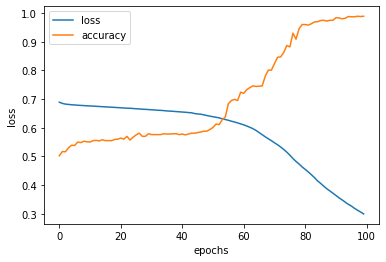

In [49]:
pd.DataFrame(model.history).plot() 
plt.ylabel("loss") 
plt.xlabel("epochs") 

binary classification


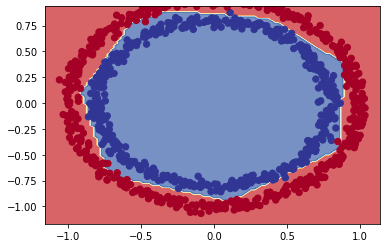

In [33]:
plot_descision_boundary(model = Circle_model, 
                        X = X, 
                        y = y)

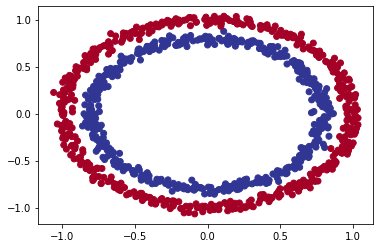

In [34]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [35]:
len(X)


1000

In [36]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [50]:
#1. create our model 

tf.random.set_seed(42) 
Circle_model_2 = tf.keras.Sequential([
                     tf.keras.layers.Dense(4, activation = "relu"),
                     tf.keras.layers.Dense(4, activation = "relu"),
                     tf.keras.layers.Dense(1, activation = "sigmoid")
])
 

 

#2. Compile the model 

Circle_model_2.compile(loss = "binary_crossentropy",
                       optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                       metrics = ["accuracy"])

 

 

#3. format the model from our storage method 

model2 = Circle_model_2.fit(X_train, y_train, epochs = 25, verbose = 0) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Text(0.5, 0, 'epochs')

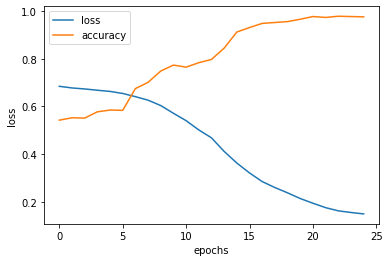

In [51]:
pd.DataFrame(model2.history).plot() 
plt.ylabel("loss") 
plt.xlabel("epochs") 

binary classification
binary classification


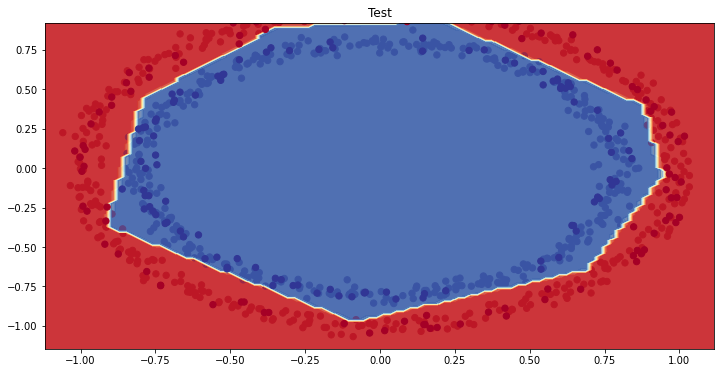

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot=(1,2,1)
plt.title("Train")
plot_descision_boundary(model = Circle_model_2, 
                        X = X_train, 
                        y = y_train)
plt.subplot=(1,2,2)
plt.title("Test")
plot_descision_boundary(model = Circle_model_2, 
                        X = X_test, 
                        y = y_test)
plt.show();

In [53]:
tf.random.set_seed(42)
circle_model_3 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(4, activation = "relu"),
                                      tf.keras.layers.Dense(4, activation = "relu"),
                                      tf.keras.layers.Dense(1, activation = "sigmoid")
])
circle_model_3.compile(loss = "binary_crossentropy",
                       optimizer = "Adam",
                       metrics = ["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model3 = circle_model_3.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler], verbose = 0)


Text(0.5, 0, 'epochs')

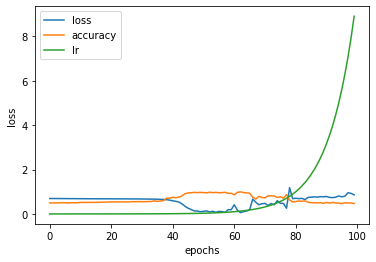

In [54]:
pd.DataFrame(model3.history).plot() 
plt.ylabel("loss") 
plt.xlabel("epochs") 



Text(0.5, 1.0, 'Learning rate vs. Loss')

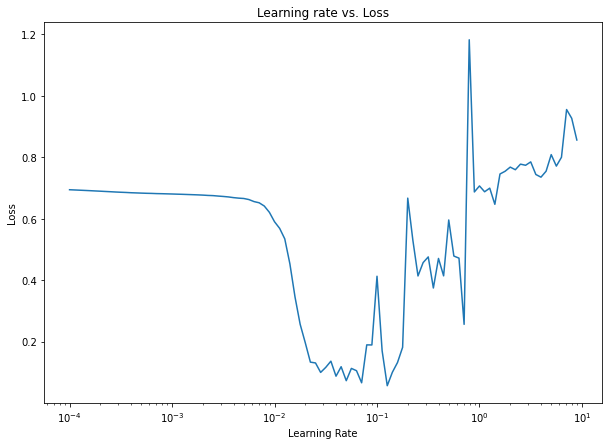

In [55]:
lrs = 1e-4 *(10**(tf.range(100)/20)) 
plt.figure(figsize = (10,7))
plt.semilogx(lrs,model3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")